In [5]:
import numpy as np

If we take an approximation to I using n subintervals, IS, and then apply Simpson's rule with double the intervals (2n), and call the result IS2. 

We can combine these two estimates to derive an accurate estimation of I
This is Weddle's rule, given by: 
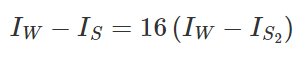

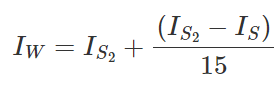

In [6]:
#See 5_070923_11_SimpsonCompositeRule
def simpsons_composite_rule(a, b, function, number_intervals=10):
    assert number_intervals % 2 == 0 #the implementatin requires that the number of subintervals is not even
    interval_size = (b-a)/number_intervals 
    I_cS2 = function(a) + function(b) # the first and last values of the function, i.e. f(x0) + f(xn) components of the equation
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i*interval_size) # the odd components i.e. 4sigf(x2i-1)
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a+i*interval_size) # the even components i.e. 2sigf(x2i)
        
    return I_cS2 * (interval_size/3.0)
    

In [7]:
def weddles_rule(a, b, function, number_intervals=10):
    S = simpsons_composite_rule(a, b, function, number_intervals)
    S2 = simpsons_composite_rule(a, b, function, number_intervals*2)
    
    return S2 + (S2 - S)/15
    

In [8]:
for i in (2, 10, 100, 1000):
    area = weddles_rule(0, np.pi, np.sin, i)
    print("Area with %g Weddle's interval(s) = %g (error=%g)"%(i, area, abs(area-2)))

Area with 2 Weddle's interval(s) = 1.99857 (error=0.00142927)
Area with 10 Weddle's interval(s) = 2 (error=6.44164e-08)
Area with 100 Weddle's interval(s) = 2 (error=6.23945e-14)
Area with 1000 Weddle's interval(s) = 2 (error=8.88178e-16)
